# Analysis on the Seasonal Pattern of Prices

#### Cleaning the data

In [1]:


import pandas as pd
import numpy as np
import re

calendarDF=pd.read_csv("../data/calendar.csv")

#replacing NaN values with 0
calendarDF.fillna(0, inplace=True)
calendarDF = calendarDF[calendarDF.price != 0]

#Extracting prices from the table
price = calendarDF['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
#replace the price column with the new column
calendarDF['price']=prices

calendarDF = calendarDF[calendarDF.price >= 0]

#separating date column into day month and year
calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str
calendarDF.head()


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Month,Day
0,32539265,2019-03-07,f,218.0,$218.00,2,1125,2019,03,07
1,32539265,2019-03-08,f,219.0,$219.00,2,1125,2019,03,08
2,32539265,2019-03-09,f,219.0,$219.00,2,1125,2019,03,09
3,32539265,2019-03-10,f,219.0,$219.00,2,1125,2019,03,10
4,32539265,2019-03-11,f,218.0,$218.00,2,1125,2019,03,11


Cleaning of data has been done and added new columns namely Year,Month and Day by splitting date.I analyzed the data by group it on the basis of Year and Month to see the trend of prices

In [2]:
yearDF=calendarDF.groupby(['Year','Month']).price.mean()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'price':'average_Price'})
yearDF['year-Month']=yearDF['Year'].map(str) + "-" + yearDF['Month'].map(str)
yearDF.to_csv('year_month_data.csv')
yearDF.head()

,Year,Month,average_Price,year-Month
0,2019,03,154.523717,2019-03
1,2019,04,152.990941,2019-04
2,2019,05,152.460873,2019-05
3,2019,06,157.387932,2019-06
4,2019,07,160.326112,2019-07


It can be seen that the data is available from March 2019 to March 2020 and when average prices are analyzed maximum rates for the listings were in the month of May. Visualizing the same for a better understanding

#### Visualizing the trend of year/Month and average prices of the listing

Text(0,0.5,'Average Price')

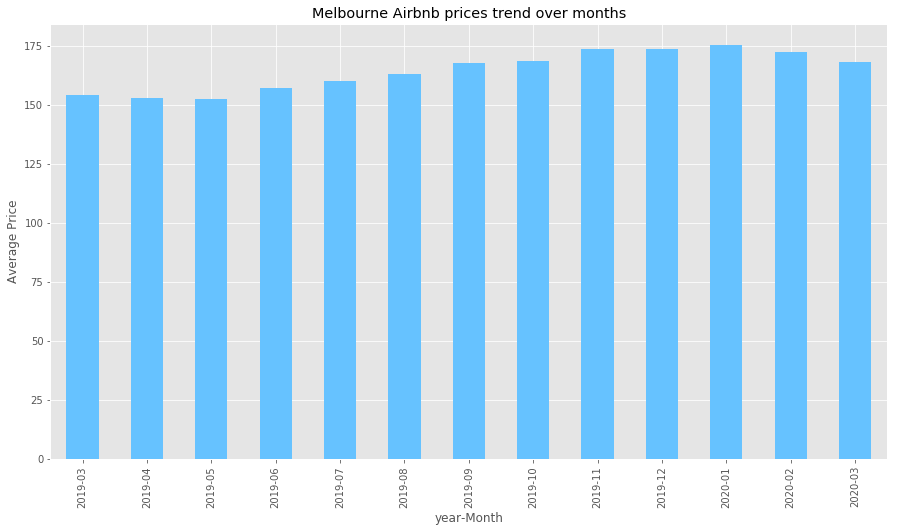

In [3]:


%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = yearDF['year-Month']
y_pos = yearDF['average_Price']

yearDF.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Melbourne Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')


It can be clearly seen that the maximum average price for listings were in the month of January, 2020 and November 2019.
To analyze the data further, I have extracted name of the day from given date and checked weather it was a holiday and what is the reason for that holiday.

In [4]:
#getting day name from date data and holidays

from datetime import date
import datetime
import calendar
import holidays

calendarDF.fillna(0, inplace=True)
aus_holidays = holidays.AU()

calendarDF['day_Name']='default'
calendarDF['holiday']='False'
calendarDF['aus_holidays_name']='working'
for index,row in calendarDF.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in aus_holidays
    calendarDF.set_value(index,'day_Name',calendar.day_name[sdate.weekday()])
    calendarDF.set_value(index,'holiday',vall)
    calendarDF.set_value(index,'aus_holidays_name',aus_holidays.get(sdate))
calendarDF.to_csv('holidays_data.csv')
calendarDF.head()


C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Month,Day,day_Name,holiday,aus_holidays_name
0,32539265,2019-03-07,f,218.0,$218.00,2,1125,2019,03,07,Thursday,False,None
1,32539265,2019-03-08,f,219.0,$219.00,2,1125,2019,03,08,Friday,False,None
2,32539265,2019-03-09,f,219.0,$219.00,2,1125,2019,03,09,Saturday,False,None
3,32539265,2019-03-10,f,219.0,$219.00,2,1125,2019,03,10,Sunday,False,None
4,32539265,2019-03-11,f,218.0,$218.00,2,1125,2019,03,11,Monday,False,None


Added 3 new columns Day_Name, Holiday and aus_holiday_name which counsits of name of the day, boolean value for "is it a holiday?" and reason for the holiday respectively.

In [5]:
#calculating Average price for each day

dayDF=calendarDF.groupby('day_Name').price.mean()
dayDF=dayDF.reset_index()
dayDF['day_num']=0

for index,row in dayDF.iterrows():
    if row['day_Name']=='Monday':
        dayDF.set_value(index,'day_num',1)
    if row['day_Name']=='Tuesday':
        dayDF.set_value(index,'day_num',2)
    if row['day_Name']=='Wednesday':
        dayDF.set_value(index,'day_num',3)
    if row['day_Name']=='Thursday':
        dayDF.set_value(index,'day_num',4)
    if row['day_Name']=='Friday':
        dayDF.set_value(index,'day_num',5)
    if row['day_Name']=='Saturday':
        dayDF.set_value(index,'day_num',6)
    if row['day_Name']=='Sunday':
        dayDF.set_value(index,'day_num',7)
dayDF=dayDF.sort_values('day_num',ascending=[1])
dayDF=dayDF.rename(columns={'price':'Average_Price'})
dayDF

C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors 

,day_Name,Average_Price,day_num
1,Monday,160.763548,1
5,Tuesday,160.895782,2
6,Wednesday,160.922975,3
4,Thursday,161.455177,4
0,Friday,173.014720,5
2,Saturday,173.831432,6
3,Sunday,161.858243,7


It can be seen that the average price of listings increases on weekends and are usual on weekdays.Lets plot it to get a better understanding

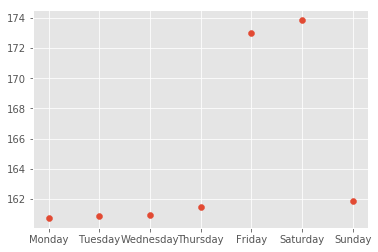

In [6]:
import matplotlib.pyplot as plt
dayname = list()
for i in dayDF['day_Name']:
    dayname.append(i)
avgprice = list()
for i in dayDF['Average_Price']:
    avgprice.append(i)
graph_input = dict(zip(dayname,avgprice))

plt.scatter(dayname,avgprice)
plt.show()


It can be seen that the prices are fairly high for the weekends than that of weekdays.Now we need to dig in into Sept 2016 and oct 2016 data to find the reason behind increase in Average prices.
Analyzing all the holidays

In [7]:
#checking which holiday has maximum listings

holidayDF=calendarDF.groupby('aus_holidays_name').listing_id.count()
holidayDF=holidayDF.reset_index()
holidayDF=holidayDF.sort_values('listing_id',ascending=[0])
holidayDF

,aus_holidays_name,listing_id
0,Anzac Day,22909
1,Australia Day,22909
2,Australia Day (Observed),22909
3,Boxing Day,22909
4,Christmas Day,22909
5,Easter Monday,22909
6,Good Friday,22909
7,New Year's Day,22909


[Text(0,0.5,'Total Number of Listings'), Text(0.5,0,'Australia Holidays Name')]

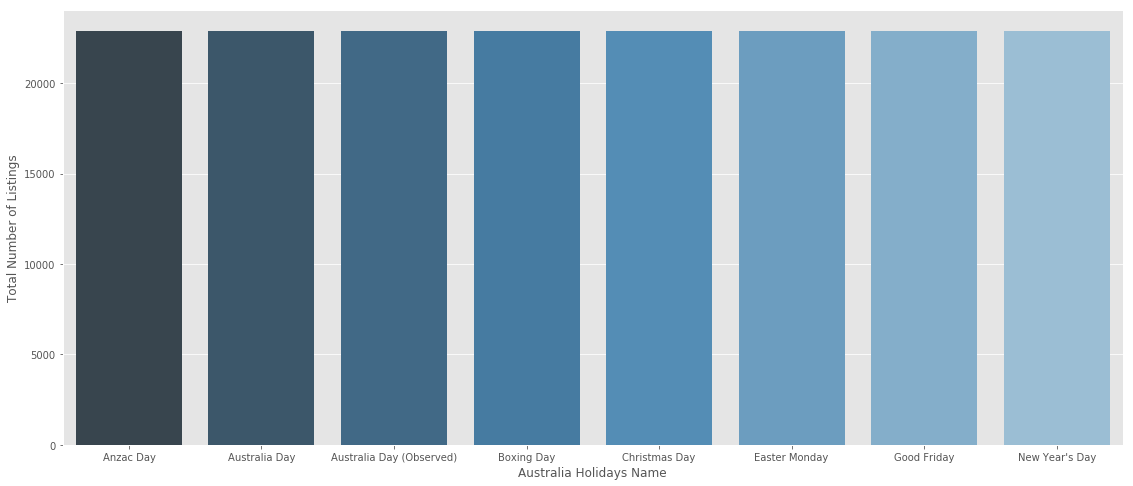

In [8]:
# visualizing the same
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("aus_holidays_name", y="listing_id", data=holidayDF,palette="Blues_d")
ax.set(xlabel='Australia Holidays Name', ylabel='Total Number of Listings')

It can be seen that the maximum number of listings is for thanksgiving which can be reasoned as its a very popular holiday.Lets dig in further to find which holiday has the maximum average price.

In [9]:
holidayPriceDF=calendarDF.groupby('aus_holidays_name').price.mean()
holidayPriceDF=holidayPriceDF.reset_index()
holidayPriceDF=holidayPriceDF.sort_values('price',ascending=[0])

holidayPriceDF.head(10)

,aus_holidays_name,price
7,New Year's Day,177.152473
3,Boxing Day,176.669475
1,Australia Day,174.676197
4,Christmas Day,174.588590
2,Australia Day (Observed),172.576367
6,Good Friday,165.013444
5,Easter Monday,152.385438
0,Anzac Day,151.500808


[Text(0,0.5,'Average Price'), Text(0.5,0,'Australia Holidays Name')]

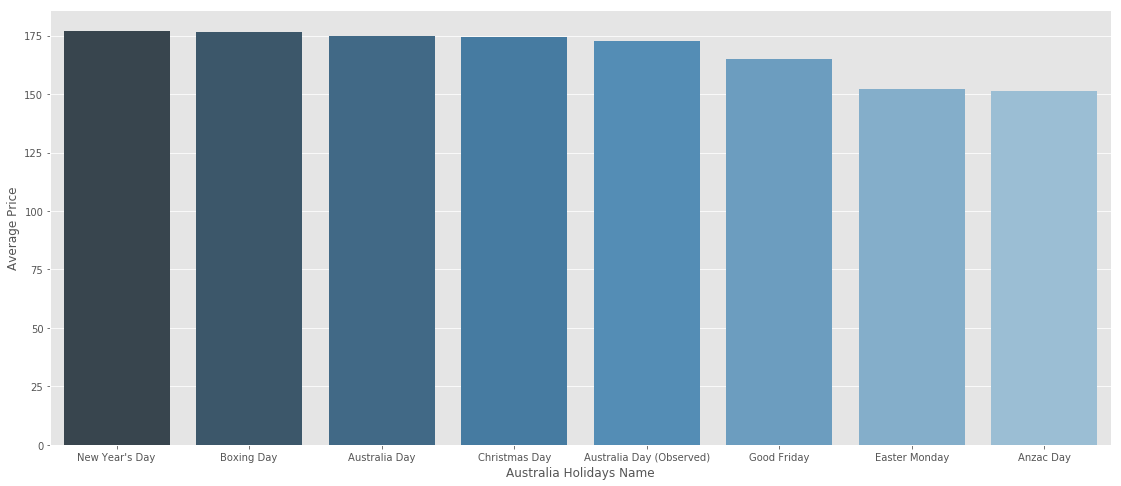

In [10]:
# visualizing the same
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,8))
ax = sns.barplot("aus_holidays_name", y="price", data=holidayPriceDF,palette="Blues_d")
ax.set(xlabel='Australia Holidays Name', ylabel='Average Price')

In [11]:
merger=pd.merge(holidayDF,holidayPriceDF,on='aus_holidays_name')
merger=merger.rename(columns={'listing_id':'number_Of_Listings'})
merger=merger.rename(columns={'price':'average_Price'})
merger

,aus_holidays_name,number_Of_Listings,average_Price
0,Anzac Day,22909,151.500808
1,Australia Day,22909,174.676197
2,Australia Day (Observed),22909,172.576367
3,Boxing Day,22909,176.669475
4,Christmas Day,22909,174.588590
5,Easter Monday,22909,152.385438
6,Good Friday,22909,165.013444
7,New Year's Day,22909,177.152473


In [29]:
checkHolidaysDF=calendarDF[((calendarDF['Year'] == '2019')|(calendarDF['Year'] == '2020')) & ((calendarDF['Month'] == '10') |(calendarDF['Month'] == '01') )]
checkHolidaysDF=checkHolidaysDF.groupby(['Year','Month','holiday']).price.mean()
checkHolidaysDF=checkHolidaysDF.reset_index()
checkHolidaysDF.head()

,Year,Month,holiday,price
0,2019,10,False,168.941964
1,2020,01,False,175.697458
2,2020,01,True,174.801679


In [30]:
#analyzing longweekednd holiday days

columbusDF=calendarDF[(calendarDF['Year'] == '2019') & ((calendarDF['Month'] == '10' )) & ((calendarDF['Day'] == '05'))]
columbusDF.groupby('Month').price.mean()
# columbusDF

Month
10    178.97429
Name: price, dtype: float64

In [32]:
#analyzing rest of the days

NocolumbusDF=calendarDF[(calendarDF['Year'] == '2019') & (calendarDF['Month'] == '10' ) & ((calendarDF['Day'] != '05'))]
NocolumbusDF.groupby('Month').price.mean()

Month
10    168.607553
Name: price, dtype: float64

It can be analyzed that on a long weekend the average price is 178.97 while for the whole month the average price was 168.6. <br>
Hence, this suggests that the price of listings increase with resprect to the presence of weekend.

In [26]:
# analyzing data from date 7th of March to date 13th of March which includes both long weekend and normal workdays

marDF=calendarDF[(calendarDF['Year'] == '2019') & (calendarDF['Month'] == '10' )& ((calendarDF['Day'] == '05' )|(calendarDF['Day'] == '06' )| (calendarDF['Day'] == '07' )| (calendarDF['Day'] == '08' )| (calendarDF['Day'] == '09' )| (calendarDF['Day'] == '10' )| (calendarDF['Day'] == '11' )| (calendarDF['Day'] == '12' )| (calendarDF['Day'] == '13' ))]
marDF=marDF.groupby('Day').price.mean()
marDF=marDF.reset_index()
marDF=marDF.sort_values('Day',ascending=[1])
marDF=marDF.rename(columns={'price':'Average_Price'})
marDF.head(10)

,Day,Average_Price
0,05,178.974290
1,06,165.895718
2,07,165.219783
3,08,165.216421
4,09,165.253176
5,10,165.452268
6,11,177.643241
7,12,178.329172
8,13,165.725217


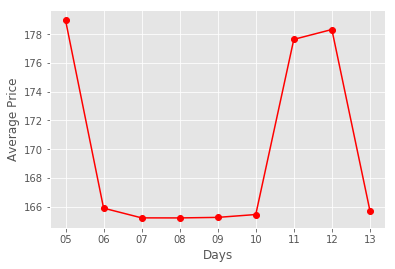

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x=marDF['Day'].tolist()
y=marDF['Average_Price'].tolist()

plt.plot(x,y, 'ro-')
plt.ylabel('Average Price')
plt.xlabel('Days')
plt.show()

Hence its can be seen that weekends have higher prices of listings which gives us another data point that price of a listing increases with the presence of weekend.

After adding up all the analyis done so far for observing seasonal changes in prices,it can be concluded that:

1. If a traveller is visiting Melbourne on a low budget then he should avoid visiting in October and January as these are the times when average price of listings are fairly high as compared to the other months.
2. If the taveller is on low budget then he should avoid visiting Melbourne on weekends as prices of listings on weekend are higher than that of weekdays.
